In [1]:
import os

In [2]:
os.listdir(".")

['.ipynb_checkpoints',
 'PS_20174392719_1491204439457_log.csv.zip',
 'Mobile Money Fraud detection.ipynb',
 'Draft.ipynb']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importer la donnée

In [4]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv.zip')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
24*31

744

In [10]:
df['step'].max()

743

In [11]:
df.isnull().sum().any()

False

In [12]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
(df['isFraud'].value_counts() / len(df)) * 100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

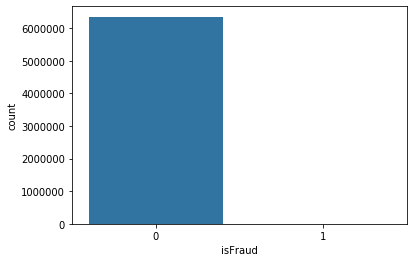

In [15]:
sns.countplot(df['isFraud'])

In [16]:
df.amount.min(), df.amount.max()

(0.0, 92445516.64)

# Analyse exploratoire des données

## Investiguons isFlaggedFraud

In [17]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [18]:
df[df['isFlaggedFraud'] == 1].amount.min(), df[df['isFlaggedFraud'] == 1].amount.max()

(353874.22, 10000000.0)

In [19]:
df[df['isFlaggedFraud'] == 0].amount.min(), df[df['isFlaggedFraud'] == 0].amount.max()

(0.0, 92445516.64)

## Type de transactions

In [20]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Deux types de clients:
* clients normaux
* marchands

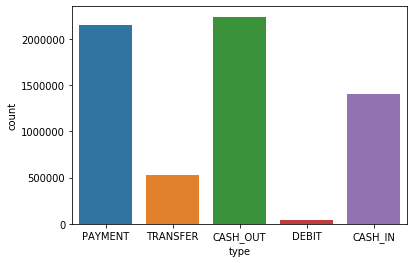

In [21]:
sns.countplot(df['type'])

In [22]:
df.groupby(['type', 'isFraud']).size()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
dtype: int64

In [23]:
data = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])].reset_index(drop=True)

In [24]:
len(df), len(data)

(6362620, 2770409)

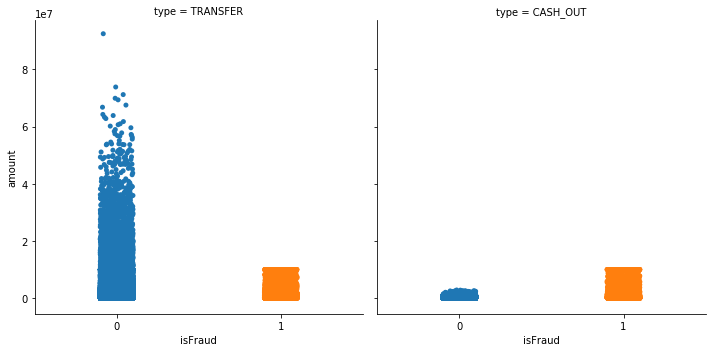

In [25]:
sns.catplot(data=data, x='isFraud', y='amount', col='type')
plt.show()

## Marchands

In [26]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [27]:
data[data['nameDest'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [28]:
data[data['nameOrig'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


## FRaud = transfert + cashout ?

In [29]:
fraud = data[data["isFraud"] == 1]

In [31]:
fraud[fraud['type'] == 'TRANSFER'].nameDest.isin(fraud[fraud['type'] == 'CASH_OUT'].nameOrig).any()

False

In [35]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2075783,332,CASH_OUT,190283.08,C143281723,199312.0,9028.92,C1120873196,0.00,190283.08,0,0
2102372,346,CASH_OUT,187321.57,C92285845,0.0,0.00,C1648133187,494221.72,681543.29,0,0
1875247,307,CASH_OUT,20869.93,C1511968672,19085.0,0.00,C806219765,383038.53,403908.46,0,0
1271785,228,CASH_OUT,383741.97,C753801834,10314.0,0.00,C2142067910,1097065.67,1480807.64,0,0
215309,19,CASH_OUT,52723.39,C526664989,0.0,0.00,C868288978,1486557.86,1539281.26,0,0


In [36]:
data['type'].value_counts()

CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

## Initiateur n'a pas d'argent

In [37]:
data[data['oldbalanceOrg'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
7,1,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0
15,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0
16,1,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0
17,1,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0
18,1,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0
19,1,TRANSFER,125872.53,C1443967876,0.0,0.0,C392292416,348512.00,3420103.09,0,0
20,1,TRANSFER,379856.23,C1449772539,0.0,0.0,C1590550415,900180.00,19169204.93,0,0
21,1,TRANSFER,1505626.01,C926859124,0.0,0.0,C665576141,29031.00,5515763.34,0,0
22,1,TRANSFER,554026.99,C1603696865,0.0,0.0,C766572210,579285.56,0.00,0,0
23,1,TRANSFER,147543.10,C12905860,0.0,0.0,C1359044626,223220.00,16518.36,0,0


In [38]:
data[data['oldbalanceOrg'] == 0].isFraud.value_counts()

0    1308541
1         41
Name: isFraud, dtype: int64

In [39]:
data['oldbalanceOrgMissing'] = (data['oldbalanceOrg'] == 0)

In [40]:
data[data['newbalanceDest'] == 0].isFraud.value_counts()

0    12508
1     4091
Name: isFraud, dtype: int64

In [41]:
data['newbalanceDestMissing'] = (data['newbalanceDest'] == 0)

In [42]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbalanceOrgMissing,newbalanceDestMissing
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,False,True
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,False,True
2,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,False,False
3,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,False,True
4,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,False,False


## Verifions

In [ ]:
data['newbalanceOrig'] = data['oldbalanceOrg'] - data['amount']
data['newbalanceDest'] = data['oldbalanceDest'] + data['amount']

In [43]:
data['errorOrig'] = data['newbalanceOrig'] - (data['oldbalanceOrg'] - data['amount'])
data['errorDest'] = data['newbalanceDest'] - (data['oldbalanceDest'] + data['amount'])

In [44]:
data[['errorOrig', 'errorDest']].describe()

,errorOrig,errorDest
count,2.770409e+06,2.770409e+06
mean,2.859850e+05,2.864713e+04
std,8.753230e+05,5.934794e+05
min,-1.000000e-02,-1.000000e+07
25%,5.185310e+04,0.000000e+00
50%,1.435971e+05,0.000000e+00
75%,2.798912e+05,0.000000e+00
max,9.244552e+07,7.588573e+07


## Matrice de correlation

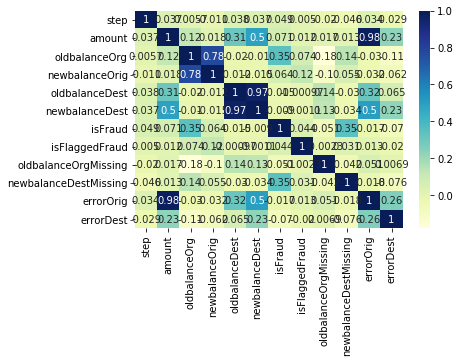

In [45]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')

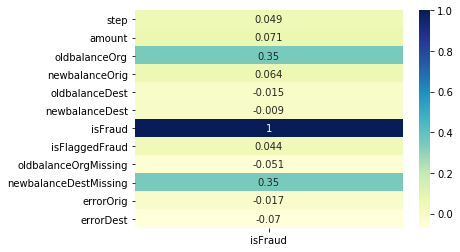

In [46]:
sns.heatmap(corr[['isFraud']], annot=True, cmap='YlGnBu')

# Modeling

In [47]:
X = data.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud', 'isFraud'], axis=1)
y = data['isFraud']

In [48]:
X['type'] = X['type'].map({'TRANSFER': 0, 'CASH_OUT': 1})

In [49]:
X['type'].value_counts()

1    2237500
0     532909
Name: type, dtype: int64

## Traintest split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [52]:
y_train.value_counts()/ len(y_train)

0    0.997036
1    0.002964
Name: isFraud, dtype: float64

In [53]:
y_test.value_counts()/ len(y_test)

0    0.997035
1    0.002965
Name: isFraud, dtype: float64

## Gradient Boosting Machine

In [54]:
import xgboost as xgb

In [55]:
clf = xgb.XGBClassifier(max_depth=3, n_jobs=-1)

In [56]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [58]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [59]:
y_pred = clf.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
precision_score(y_pred, y_test)

0.9963481436396835

In [66]:
recall_score(y_pred, y_test)

1.0

In [67]:
f1_score(y_pred, y_test)

0.9981707317073171

In [68]:
confusion_matrix(y_pred, y_test)

array([[552439,      6],
       [     0,   1637]])

In [69]:
from xgboost import to_graphviz

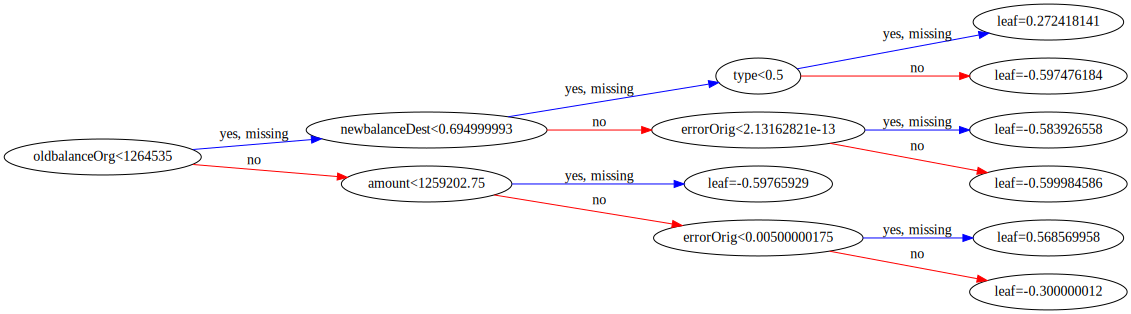

In [70]:
to_graphviz(clf, rankdir='LR')